**Внимание!!!** Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.

В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.

Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
которые необходимо произвести, что бы сопоставить признаки целевому значению.


**ПОДБОР ПАРАМЕТРОВ В ОТДЕЛЬНЫХ ФАЙЛАХ**, важно там сохранять ramdom_seed для повторимости результата
данные файлы обязательны к размещению в репозитории


**ЦЕЛЬ РАБОТЫ** построить модель **не более, чем на 20 признаках!** 

В Датасете есть гарантировано шумящие столбцы. Их нужно найти и удалить. Важно сохранить имена оставщихся столбцов (далее - значимых столбцов).

**Оценивается метрика MAPE, максимальная ошибка и найденые значимые для модели столбцы.**

**Дополнительный балл** оценить вклад значимых признаков (из mask) в максимальную ошибку на тренировочном наборе train значимых признаков (shap)

### Подключение библиотек

In [1]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

### Обучение и выполнение лучшей модели

In [3]:
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения (тюник в сопровождающих файлах)

In [4]:
# Путь к тренировочному набору
path_train =  'train_house.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  =  'test_house.csv'# содержит только имя файла, без имен папок

In [5]:
# Блок(и) обучения и поверки модели, а также отбора необходимых значимых столбцов

In [6]:
df = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [7]:
important_col = ['35',
 '11',
 '20',
 '21',
 '7',
 '13',
 '2',
 '17',
 '33',
 '28',
 '6',
 '23',
 '22',
 '25',
 '37',
 '18',
 '30']

In [8]:
x_train = df[important_col]
y_train = df['price']

In [9]:
boost = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, subsample=0.7)

In [10]:
boost.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, subsample=0.7)

In [11]:

y_pred = boost.predict(x_train)
print(mean_absolute_percentage_error(y_train,y_pred))


0.08389461884008849


In [12]:
# Блок предсказания с использованием тестового набора

In [13]:
# Маска отобраных ** НАЗВАНИЙ СТОЛБЦОВ ** для предсказания из тестового набора
mask = important_col
X_test = pd.read_csv(path_test)[mask]

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict =  boost.predict(X_test)


In [14]:
y_predict

array([3342.94050617, 4807.00639323, 3212.18892421, 3371.05460983,
       3170.14036986, 3243.76900208, 2924.06805867, 4234.13049606,
       2587.84804023, 2632.32595483, 2508.79418521, 2023.65206624,
       2613.2884278 , 2793.20500122, 3173.05503156, 5153.9334082 ,
       3269.76968102, 4764.40753003, 3377.40046573, 1901.90751679,
       2796.60959301, 2673.69618297, 4989.40144604, 4769.1375753 ,
       3155.20935673, 2503.57051482, 1892.82192019, 4033.9177996 ,
       2434.30411755, 2815.08745357, 5232.92223928, 3881.89692537,
       3315.227657  , 3250.44342388, 2997.00367698, 4616.55421883,
       2606.55657046, 2770.16952011, 5039.75909485, 2156.68793619,
       4320.11720706, 3636.6945194 , 1770.5763249 , 4594.99129984,
       2893.09603477, 3930.18048608, 1446.13110822, 2421.01723029,
       2692.35419047, 4603.84902643, 2934.6359604 , 2755.10631831,
       4430.79052961, 2194.69561988, 4324.73606677, 2446.33733386,
       2301.61174875, 2777.05662411, 2672.15079735, 4634.63601

(234,) (234, 1) 17
(234,) (234,)
Отрицательные цены -  0
Max Error: 1,670
MAPE Error: 12.66


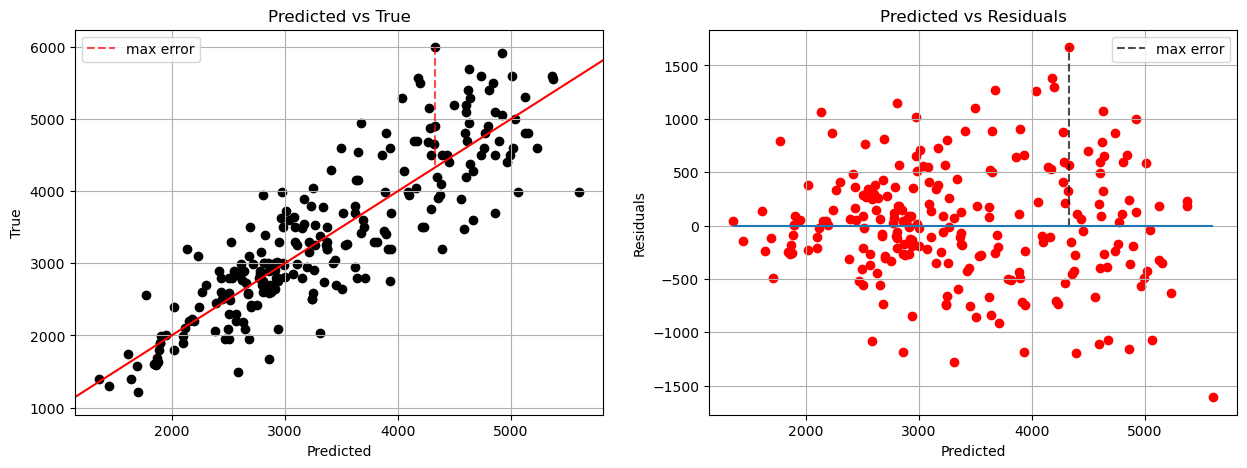

,index,0
0,9,1
1,37,log_rnd_1
2,17,log_rnd_2
3,26,log_rnd_3
4,16,onehot__housing_type_(a) single
5,3,onehot__housing_type_(b) double
6,8,onehot__housing_type_(c) multi
7,21,onehot__laundry_(a) in-unit
8,5,onehot__laundry_(b) on-site
9,15,onehot__laundry_(c) no laundry


In [15]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = pd.read_csv("test_Y_true_house.csv")
print(y_predict.shape, y_true.shape, len(mask))
y_true = y_true.values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))


def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print("MAPE Error:", "{:,.2f}".format(mape*100))

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

import pickle
with open('saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)